In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from copy import copy
from skimage import morphology
import pandas as pd
import itertools
import math
import scipy.stats as stats
import seaborn as sns


plt.rcParams['figure.figsize'] = (10,6)
%config InlineBackend.figure_format = 'retina'

In [19]:
def main(i):
    path = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotations/manually_mito_01-for-per-cell-quantification-220823//" +  str(i).zfill(4) + ".png"
    mito_er = cv2.imread(path, 0)
    mito =  copy(mito_er) 
    mito[mito != 1] = 0
    mito_peri = morphology.binary_dilation(mito, morphology.diamond(1)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(0)).astype(np.uint8)

    ans = np.sum(mito_peri)
    print(f"image{i} {ans}")
    return ans

In [50]:

shCtrl_Ctrl = []
for i in range(0,17):

    shCtrl_Ctrl.append(main(i))

shCtrl_Tam = []
for i in range(17, 34):
    if i == 18:
        pass
    else:
        shCtrl_Tam.append(main(i))


shFKBP8_Ctrl = []
for i in range(34, 54):
    if i == 45 or i == 51:
        pass
    else:
        shFKBP8_Ctrl.append(main(i))
  
    
shFKBP8_Tam = []
for i in range(54, 73):
        shFKBP8_Tam.append(main(i))
    

image0 1910
image1 657
image2 2295
image3 4235
image4 3611
image5 3201
image6 2587
image7 2646
image8 2576
image9 3050
image10 1388
image11 5757
image12 2727
image13 3329
image14 2147
image15 1851
image16 978
image17 1393
image19 705
image20 808
image21 1846
image22 1392
image23 1827
image24 2416
image25 572
image26 2694
image27 2794
image28 2613
image29 2062
image30 2619
image31 2317
image32 1914
image33 1391
image34 1512
image35 4556
image36 1808
image37 1045
image38 1021
image39 2269
image40 604
image41 4055
image42 1779
image43 951
image44 1631
image46 2980
image47 1896
image48 1060
image49 2777
image50 1935
image52 5232
image53 1094
image54 2086
image55 860
image56 1633
image57 1307
image58 2519
image59 2553
image60 1842
image61 4484
image62 2340
image63 2202
image64 2408
image65 2584
image66 2040
image67 2424
image68 3083
image69 4317
image70 1330
image71 1666
image72 1304


In [51]:
 
def smirnov_grubbs(data, alpha):
    x, o = list(data), []
    while True:
        n = len(x)
        t = stats.t.isf(q=(alpha / n) / 2, df=n - 2)
        tau = (n - 1) * t / np.sqrt(n * (n - 2) + n * t * t)
        i_min, i_max = np.argmin(x), np.argmax(x)
        myu, std = np.mean(x), np.std(x, ddof=1)
        i_far = i_max if np.abs(x[i_max] - myu) > np.abs(x[i_min] - myu) else i_min
        tau_far = np.abs((x[i_far] - myu) / std)
        if tau_far < tau: break
        o.append(x.pop(i_far))
    return (np.array(x), np.array(o))

In [57]:
df1 = pd.DataFrame({"Condition": "shCtrl_Tam-", "mito_perimeter" : shCtrl_Ctrl})
df2 = pd.DataFrame({"Condition": "shCtrl_Tam+", "mito_perimeter" : shCtrl_Tam})
df3 =  pd.DataFrame({"Condition": "shFKBP8_Tam-", "mito_perimeter" : shFKBP8_Ctrl})
df4 =  pd.DataFrame({"Condition": "shFKBP8_Tam+", "mito_perimeter" : shFKBP8_Tam})

df =df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df.to_csv(r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/data//mito_circumference_per_image-for-per-cell-quantification.csv")
df

<ipython-input-57-e94789266d4d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =df1.append(df2)
<ipython-input-57-e94789266d4d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)
<ipython-input-57-e94789266d4d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4)


,Condition,mito_perimeter
0,shCtrl_Tam-,1910
1,shCtrl_Tam-,657
2,shCtrl_Tam-,2295
3,shCtrl_Tam-,4235
4,shCtrl_Tam-,3611
5,shCtrl_Tam-,3201
6,shCtrl_Tam-,2587
7,shCtrl_Tam-,2646
8,shCtrl_Tam-,2576
9,shCtrl_Tam-,3050


In [58]:
df = df.dropna()

In [59]:
pd.set_option('display.max_rows', 80)
df

,Condition,mito_perimeter
0,shCtrl_Tam-,1910
1,shCtrl_Tam-,657
2,shCtrl_Tam-,2295
3,shCtrl_Tam-,4235
4,shCtrl_Tam-,3611
5,shCtrl_Tam-,3201
6,shCtrl_Tam-,2587
7,shCtrl_Tam-,2646
8,shCtrl_Tam-,2576
9,shCtrl_Tam-,3050


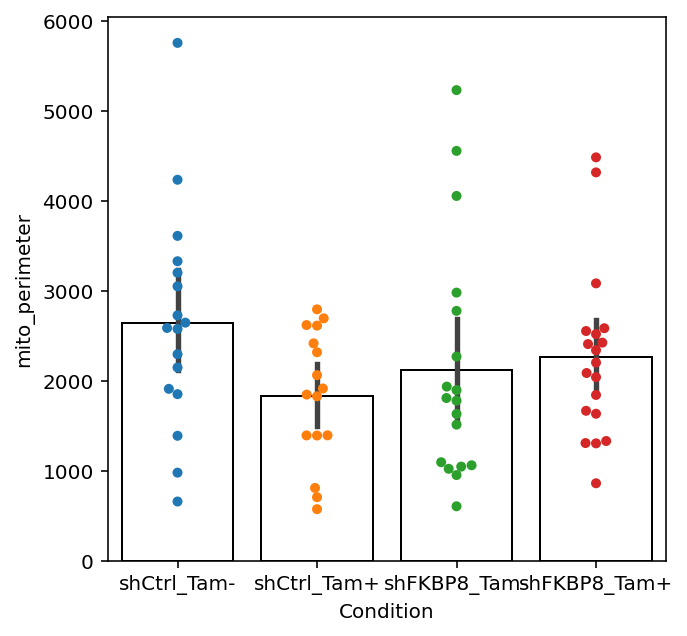

In [61]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1 = sns.swarmplot(x="Condition", y="mito_perimeter", 
                    data=df, dodge=True) #
#ax1 = sns.boxplot(data=df, x="Condition", y='sum of intensity', orient='v', color='white')
ax1 = sns.barplot(data=df, x ="Condition", y = "mito_perimeter", color = "white", edgecolor = "black")

#plt.title('Overlap (PDZD8 intensity on mito)')